Checking

\begin{equation}\label{scatter_x2}
x^2 u_{n,m} = \frac{w_0^2}{4}
\Big[
	(1 - i \frac{z}{z_R})^2
	\sqrt{(n+1)(n+2)} u_{n+2,m}
	+
	(2n+1)
	(1+ (\frac{z}{z_R})^2)
	u_{n,m}
	+
	\sqrt{n(n-1)}
	(1+i \frac{z}{z_R} )^2
	u_{n-2,m}
\Big]
\end{equation}

In [1]:
import PauLisa as pl,plback as plb, PL_Plot as plplt, numpy as np, matplotlib.pyplot as plt, cmath as cm

from mpmath import quadgl
from numpy import pi as pi
import mpmath as mp
import scipy.io


inf=np.inf

In [2]:
plane = pl.Plane(-2e-3, 2e-3, 300, -2e-3, 2e-3, 300)
params = pl.Params(1064e-9, 0.00023067,0)
n=3
modes=plb.modes((n,0,1))
pl.show_modes(modes)

n\m [0]
0   [0]
1   [0]
2   [0]
3   [1]


In [3]:
#Apply scatter to create new modes
z=0.00023067
k = params.getK()
w0 = params.getW0()
zr = params.getZr()
w_z = pl.w(z,params)

term_minus1=pl.x_plus_1(w0,z,zr,n)
term_plus1=pl.x_minus_1(w0,z,zr,n)
sc_modes = plb.modes(((n+2),0,0))
sc_modes[n+2][0]+=pl.x_plus_2(w0,z,zr,n)
sc_modes[n][0]+=pl.x_zero_2(w0,z,zr,n)
sc_modes[n-2][0]+=pl.x_minus_2(w0,z,zr,n)


In [4]:
f2 = pl.calculate(params,plane,sc_modes,z)

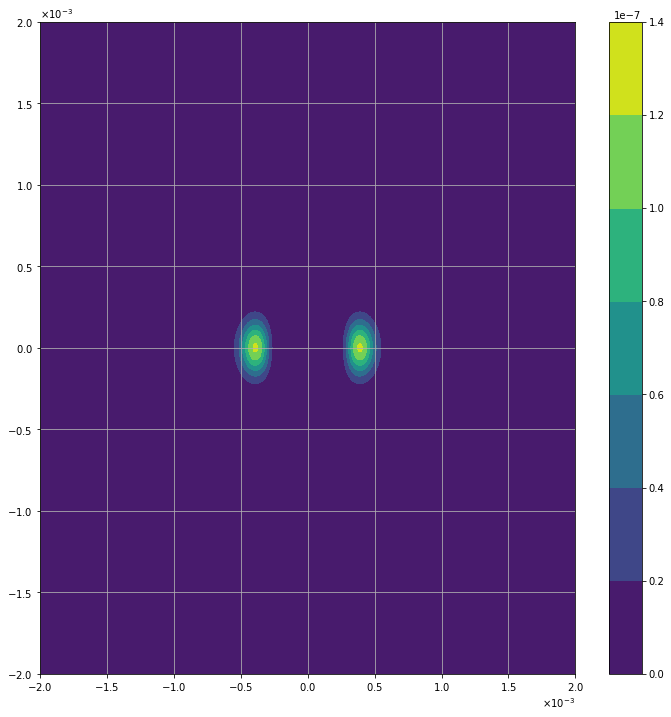

In [5]:
fig, ax = plt.subplots(figsize=(12, 12))
cs = plt.contourf(f2.plane.getX(), f2.plane.getY(), abs(f2.getAmp() ** 2))

ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)

cbar = fig.colorbar(cs)

plt.grid()

#plt.savefig("th_full_second_order.png")

In [6]:
f2 = pl.calculate_x2(params,plane,modes,z)

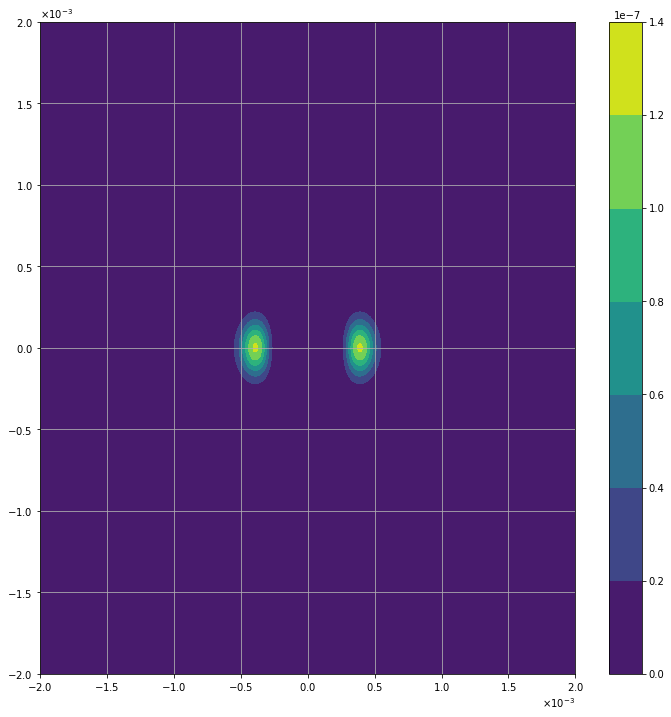

In [7]:
fig, ax = plt.subplots(figsize=(12, 12))
cs = plt.contourf(f2.plane.getX(), f2.plane.getY(), abs(f2.getAmp() ** 2))

ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)

cbar = fig.colorbar(cs)

plt.grid()

#plt.savefig("th_full_second_order.png")

(-4e-05, 2e-05)

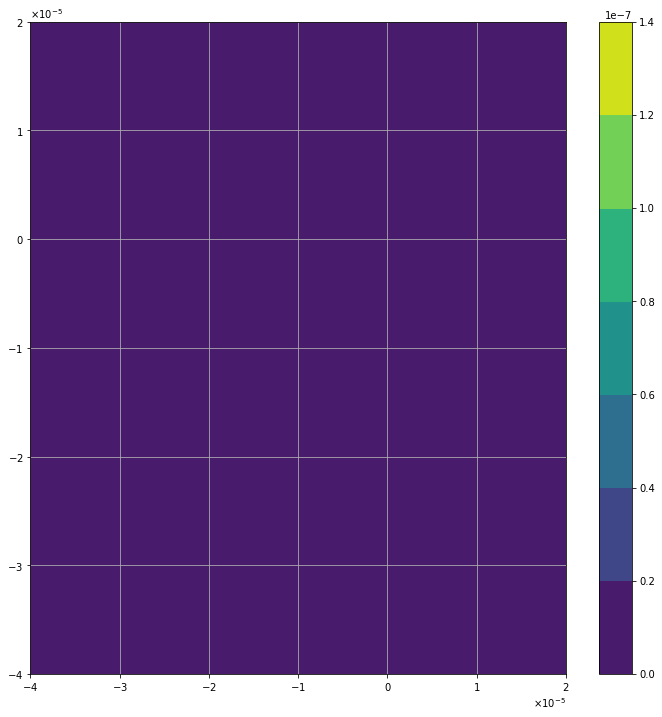

In [8]:
fig, ax = plt.subplots(figsize=(12, 12))
cs = plt.contourf(f2.plane.getX(), f2.plane.getY(), abs(f2.getAmp() ** 2))

ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)

cbar = fig.colorbar(cs)

plt.grid()
plt.xlim([-40e-6,20e-6])
plt.ylim([-40e-6,20e-6])
#plt.savefig("th_zoom_second_order.png")